In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/dataset.csv")

val_size = 0.2
tr_df, va_df = train_test_split(df, stratify=df.tag, test_size=val_size, random_state=1234)

In [3]:
# Adjusting & checking value counts of validation split so that we can compare it to the training split's class counts.
print(
    "Training Data Counts",
    tr_df.tag.value_counts(),
    "\n---\n",
    "Val Data Counts",
    va_df.tag.value_counts() * int((1-val_size)/val_size)
)

Training Data Counts tag
natural-language-processing    248
computer-vision                228
other                           85
mlops                           50
Name: count, dtype: int64 
---
 Val Data Counts tag
natural-language-processing    248
computer-vision                228
other                           84
mlops                           52
Name: count, dtype: int64


In [4]:
from collections import Counter
import matplotlib.pyplot as plt 
import seaborn as sns ; sns.set_theme()
import warnings ; warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS

In [5]:
all_tags = Counter(df.tag)
tags, tag_counts = zip(*all_tags.most_common())

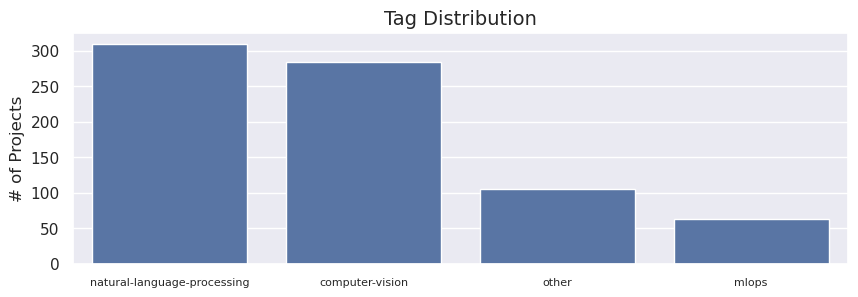

In [6]:
plt.figure(figsize=(10,3))
ax = sns.barplot(x=list(tags), y=list(tag_counts))
ax.set_xticklabels(tags, rotation=0, fontsize=8)
plt.title("Tag Distribution", fontsize=14)
plt.ylabel("# of Projects", fontsize=12)
plt.show()

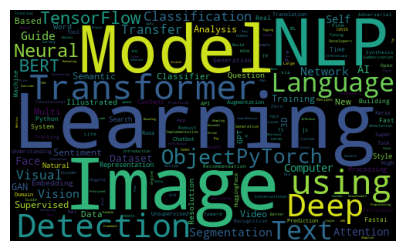

In [7]:
tag = "natural-language-processing"
tag2 = "computer-vision"
plt.figure(figsize=(10,3))
subset = df[(df.tag==tag) | (df.tag==tag2)] # filtering with 2 conditions
text = subset.title.values
cloud = WordCloud(
    stopwords=STOPWORDS,
    background_color="black",
    collocations=False,
    width=500,
    height=300,
          
).generate(" ".join(text))
plt.axis("off")
plt.imshow(cloud)

In [8]:
import numpy as np

# Data Transformations
x = np.random.random(4)
x_std = (x-np.mean(x)) / np.std(x)
x_sca = (x-x.min()) / (x.max() - x.min())
x_bin = np.digitize(x, np.linspace(0,1,5))

In [9]:
# Data Encoding

# Label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(["saigon", "hanoi", "hue", "danang"])
le.transform(["danang", "hue", "hue"])
le.inverse_transform([0,1,2,3])

# One Hot
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
X = [["Male"],["Female"],["Female"],["Male"],["Others"]]
oh.fit(X)
oh.categories_
oh.transform([["Male"], ["Female"]]).toarray()
oh2 = OneHotEncoder()
X2 = [["Male",1],["Female", 2],["Female", 1],["Male",2],["Others",1]]
oh2.fit(X2)
oh2.categories_
oh2.transform([["Male", 2], ["Female", 1]]).toarray()

# Embeddings
import torch
from torch.nn import Embedding

emb = Embedding(5,3)
ip = torch.LongTensor([[1,2,3,4], [4,3,2,1]])
emb(ip)

tensor([[[ 1.4553, -0.3624, -0.2125],
         [ 0.5375,  0.5717, -0.0225],
         [-0.0468,  1.2214,  0.5331],
         [ 0.8137, -0.1909,  1.1522]],

        [[ 0.8137, -0.1909,  1.1522],
         [-0.0468,  1.2214,  0.5331],
         [ 0.5375,  0.5717, -0.0225],
         [ 1.4553, -0.3624, -0.2125]]], grad_fn=<EmbeddingBackward0>)

Extraction 

Combine existing features
Transfer Learning
Autoencoder
Similarity
PCA
Counts (ngram)

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction 

In [10]:
import json
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [11]:
# Combine features and into new column
df["text"] = df.title + " " + df.description

nltk.download("stopwords")
SW = stopwords.words("english")

def clean_text(text, stopwords=SW):
    
    # Lower case it
    text = text.lower()

    # Remove stopwords
    pattern = re.compile(r'\b(' + r"|".join(stopwords) + r")\b\s*")
    text = pattern.sub('', text)

    # Spacing and filters
    text = re.sub(r"([!\"'#$%&()*\+,-./:;<=>?@\\\[\]^_`{|}~])", r" \1 ", text)  # add spacing
    text = re.sub("[^A-Za-z0-9]+", " ", text)  # remove non alphanumeric chars
    text = re.sub(" +", " ", text)  # remove multiple spaces
    text = text.strip()  # strip white space at the ends
    text = re.sub(r"http\S+", "", text)  #  remove links

    return text

odf = df.copy()
df.text = df.text.apply(clean_text)
print (f"{odf.text.values[0]}\n{df.text.values[0]}")

Comparison between YOLO and RCNN on real world videos Bringing theory to experiment is cool. We can easily train models in colab and find the results in minutes.
comparison yolo rcnn real world videos bringing theory experiment cool easily train models colab find results minutes


[nltk_data] Downloading package stopwords to /home/tc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# DataFrame cleanup
df = df.drop(columns=["id", "created_on", "title", "description"], errors="ignore")

# drop cols
df = df.dropna(subset=["tag"])  # drop nulls
df = df[["text", "tag"]]  # rearrange cols
df.head()

,text,tag
0,comparison yolo rcnn real world videos bringin...,computer-vision
1,show infer tell contextual inference creative ...,computer-vision
2,awesome graph classification collection import...,other
3,awesome monte carlo tree search curated list m...,other
4,attentionwalk pytorch implementation watch ste...,other


In [13]:
tags = tr_df.tag.unique().tolist()
num_classes= len(tags)
class_to_index = { tag: i for i, tag in enumerate(tags) }
df["tag"] = df["tag"].map(class_to_index)
df.head()

,text,tag
0,comparison yolo rcnn real world videos bringin...,2
1,show infer tell contextual inference creative ...,2
2,awesome graph classification collection import...,3
3,awesome monte carlo tree search curated list m...,3
4,attentionwalk pytorch implementation watch ste...,3


In [14]:
def decode(indices, index_to_class):
    return [ index_to_class[index] for index in indices ]

decode( df.head()["tag"].values, {v:k for k, v in class_to_index.items()} )

['computer-vision', 'computer-vision', 'other', 'other', 'other']

In [15]:
from transformers import BertTokenizer

def tokenize(batch) -> dict:
    tok = BertTokenizer.from_pretrained("allenai/scibert_scivocab_uncased", return_dict=False)
    enc_ip = tok(batch["text"].tolist(), return_tensors="np", padding="longest")
    return dict(ids=enc_ip["input_ids"], masks=enc_ip["attention_mask"], targets=np.array(batch["tag"]))


In [16]:
def pp(df, class_to_index):
    # Feature 'engineering' with addition
    df["text"] = df.title + " " + df.description
    # Clean text: lower case, remove stopwords, use regex deal with spaces & special characters
    df["text"] = df.text.apply(clean_text)
    # Drop unnecessary baggage
    df = df.drop(columns=["id", "created_on", "title", "description"], errors="ignore")
    # Arrange
    df = df[["text", "tag"]]
    df["tag"] = df["tag"].map(class_to_index)
    op = tokenize(df)
    return op


In [ ]:
import ray

# Ensure determinism
ray.data.DatasetContext.get_current().execution_options.preserve_order = True

# Ingest
ds = ray.data.read_csv("https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/dataset.csv")
ds = ds.random_shuffle(seed=1234)

# Split
import sys
from ray.data import Dataset
from typing import Tuple
sys.path.append("..")

def stratify_split(
    ds: Dataset,
    stratify: str,
    test_size: float,
    shuffle: bool = True,
    seed: int = 1234,
) -> Tuple[Dataset, Dataset]:
    """Split a dataset into train and test splits with equal
    amounts of data points from each class in the column we
    want to stratify on.

    Args:
        ds (Dataset): Input dataset to split.
        stratify (str): Name of column to split on.
        test_size (float): Proportion of dataset to split for test set.
        shuffle (bool, optional): whether to shuffle the dataset. Defaults to True.
        seed (int, optional): seed for shuffling. Defaults to 1234.

    Returns:
        Tuple[Dataset, Dataset]: the stratified train and test datasets.
    """

    def _add_split(df: pd.DataFrame) -> pd.DataFrame:  # pragma: no cover, used in parent function
        """Naively split a dataframe into train and test splits.
        Add a column specifying whether it's the train or test split."""
        train, test = train_test_split(df, test_size=test_size, shuffle=shuffle, random_state=seed)
        train["_split"] = "train"
        test["_split"] = "test"
        return pd.concat([train, test])

    def _filter_split(df: pd.DataFrame, split: str) -> pd.DataFrame:  # pragma: no cover, used in parent function
        """Filter by data points that match the split column's value
        and return the dataframe with the _split column dropped."""
        return df[df["_split"] == split].drop("_split", axis=1)

    # Train, test split with stratify
    grouped = ds.groupby(stratify).map_groups(_add_split, batch_format="pandas")  # group by each unique value in the column we want to stratify on
    train_ds = grouped.map_batches(_filter_split, fn_kwargs={"split": "train"}, batch_format="pandas")  # combine
    test_ds = grouped.map_batches(_filter_split, fn_kwargs={"split": "test"}, batch_format="pandas")  # combine

    # Shuffle each split (required)
    train_ds = train_ds.random_shuffle(seed=seed)
    test_ds = test_ds.random_shuffle(seed=seed)

    return train_ds, test_ds

train_ds, val_ds = stratify_split(ds, stratify="tag", test_size=0.2)

# Mapping
tags = train_ds.unique(column="tag")
class_to_index = { tag: i for i, tag in enumerate(tags) }

In [34]:
# Distributed preprocessing: mapping of tags to data & applying pre-processing
sample_ds = train_ds.map_batches(
    pp,
    fn_kwargs={"class_to_index": class_to_index},
    batch_format="pandas",
)
